### Answers to Assignment 4 of 230E

##### Authors(alphabetic order)
1) Ishan Pathak ishan_pathak@berkeley.edu
2) Leonid Maksymenko leo.maksymenko@berkeley.edu
3) Nymph Qiu nymph_qiu@berkeley.edu
4) Xuanzhong Ren rxz19@berkeley.edu

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VECM
import statsmodels.api as sm

### Q1

$$\mathbf{\Phi}(L)\mathbf{Y}_t=\mathbf{e}_t=(\mathbf{I}-\begin{pmatrix}.5 & .1 \\ .4 & .5\end{pmatrix}L - \begin{pmatrix}0 & 0 \\ .25 & 0\end{pmatrix}L^2)\mathbf{Y}_t$$

Let $\det(\mathbf{I}-\begin{pmatrix}.5 & .1 \\ .4 & .5\end{pmatrix}z - \begin{pmatrix}0 & 0 \\ .25 & 0\end{pmatrix}z^2) = 0=\det\begin{pmatrix}1-.5z & -.1z \\ -.4-.25z & 1-.5z\end{pmatrix}=1+.25z^2-z-.04z-.025z^2$

$$z_1=3.258101144562779, z_2=1.3641210776594435$$

We could observe that roots are outside unit circle, which implies that the bivariate process is stationary.

### Q2

(a)

$$\mathbf{X}_t(I-LI) = \gamma \alpha'\mathbf{X}_tL+\Phi_1(L-L^2)\mathbf{X}_t+\epsilon_t$$

$$\Psi(L)\mathbf{X}_t=(I-LI-\gamma\alpha'L-\Phi_1(L-L^2))\mathbf{X}_t=\epsilon_t$$
$$\Psi(L)=I-(I+\gamma\alpha'+\Phi_1)L+\Phi_1L^2$$

We could observe that lag order $p=2$

(b)

$$\Psi(L) = \begin{pmatrix}1-L-\gamma_1L-\phi_{11}L+\phi_{11}L^2 & \gamma_1L-\phi_{12}L+\phi_{12}L^2\\
-\gamma_2L-\phi_{21}L+\phi_{21}L^2 & 1-L+\gamma_2L-\phi_{22}L+\phi_{22}L^2\end{pmatrix}$$

$$\mathbf{X}_t=(I+\gamma\alpha'+\Phi_1)\mathbf{X}_{t-1}-\Phi_1\mathbf{X}_{t-2}+\epsilon_t$$

Because VECM(1) is stationary, then $\Phi_1$ has all eigenvalues less than 1. And because of $\alpha=(1,-1)$, $x_{1,t-1}, x_{2,t-1}$ in $\gamma\alpha'\mathbf{X}_{t-1}$ should enjoy the sum of coefficients = 0.

### Q3

(a)

In [142]:
def sim_q_3(size=1000, lags=1):
    errors = np.random.normal(0,1,size)
    xs = []
    for i in range(size):
        if i == 0:
            xs.append(errors[0])
        else:
            xs.append(0.8*xs[i-1]+errors[i]+0.7*errors[i-1])
    y=xs
    y_lags = []
    y_lags.append(y[0:len(y)-lags])
    y_lags = np.array(y_lags).T
    y_ = np.array(y[lags:]).reshape(len(y_lags),1)
    coef = np.dot(np.dot(np.linalg.inv(np.dot(y_lags.T, y_lags)),y_lags.T),y_)
    if lags == 2:
        coef = np.mean(np.dot(y_lags.T, y_))/np.mean(np.dot(y_lags.T, np.array(y[1:len(y)-1]).reshape(len(y_lags),1)))
        return coef
    residual = y_ - np.dot(y_lags, coef)
    r_squared = np.sum((np.dot(y_lags, coef) - np.mean(y_))**2)/np.sum((y_ - np.mean(y_))**2)
    var = np.sum(residual**2)/(len(y_)-(lags+1))
    hetero_var = np.dot(y_lags.T, np.dot(np.diag(np.diag(np.dot(residual,residual.T))),y_lags))
    beta_homo_var = np.linalg.inv(np.dot(y_lags.T, y_lags))*var
    lhs = np.linalg.inv(np.dot(y_lags.T, y_lags))
    beta_hetero_var = np.dot(np.dot(lhs, hetero_var), lhs.T)
    # beta_nw_var = np.dot(np.dot(lhs, nw_var), lhs.T)
    data = {"type": [],"coef":[], "homo_std":[],"hetero_std":[]}
    log_likelihood = -0.5*np.log(2*np.pi)*len(y_) - (len(y_)-(lags+1))/2 - 0.5 * len(y_) * np.log(var)
    AIC = -2*log_likelihood + 2 * (lags+1)
    BIC = -2*log_likelihood + np.log(len(y_)) * (lags+1)
    return coef[0,0]

In [143]:
phi_sims = [sim_q_3() for i in range(1000)]

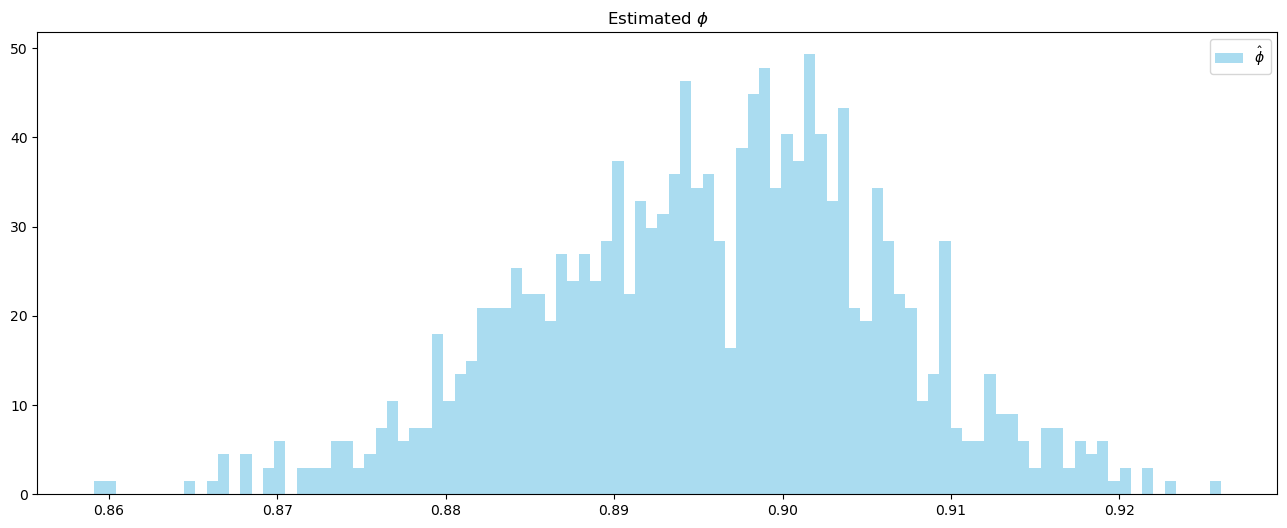

In [144]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
n, bins, patches = axes.hist(phi_sims, 100, density = 1,color ='skyblue',alpha = 0.7, label=r'$\hat{\phi}$')
axes.legend()
axes.set_title(r'Estimated $\phi$')
plt.show()

In [145]:
from scipy.stats import skew
print("skewness:",skew(phi_sims))
print("mean:", np.mean(phi_sims))

skewness: -0.2261513187734386
mean: 0.8955993360271615


We could observe that the estimated $\phi$ is not close to true value 0.8 which is due to serial correlation of error terms. And because of it, the estimator has negative skewness so it has fatter tail on the left hand side of mean value.

(b)

$$x_{t+1}=0.8(0.8x_{t-1}+\epsilon_t+0.7\epsilon_{t-1})+\epsilon_{t+1}+0.7\epsilon_t=0.64x_{t-1}+\epsilon_{t+1}+1.5\epsilon_t+0.56\epsilon_{t-1}$$

In [146]:
phi_sims = [sim_q_3(lags=2) for i in range(1000)]

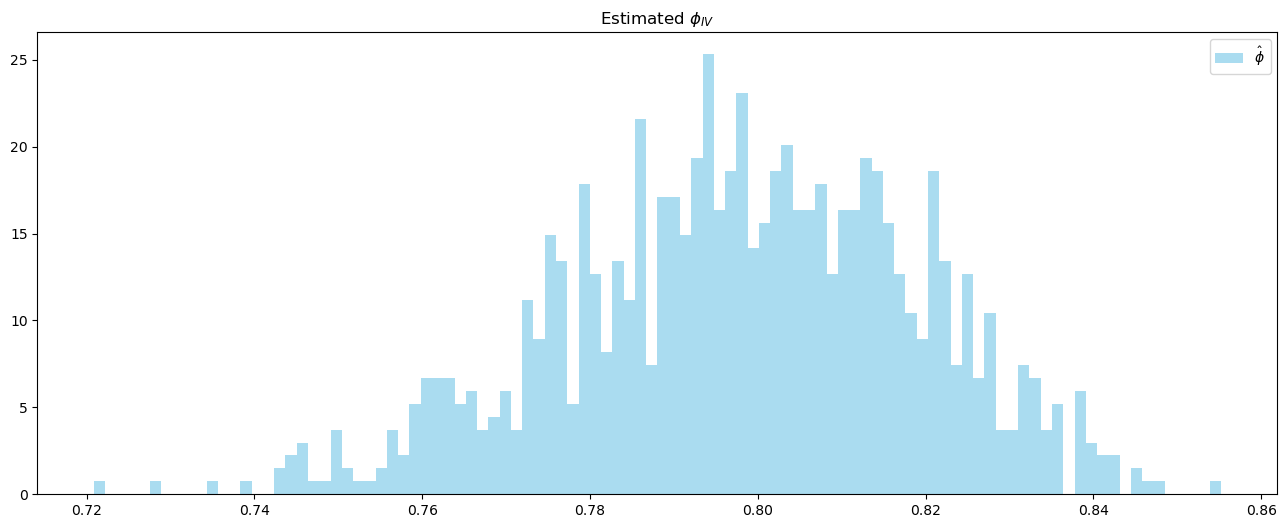

In [147]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
n, bins, patches = axes.hist(phi_sims, 100, density = 1,color ='skyblue',alpha = 0.7, label=r'$\hat{\phi}$')
axes.legend()
axes.set_title(r'Estimated $\phi_{IV}$')
plt.show()

In [148]:
from scipy.stats import skew
print("skewness:",skew(phi_sims))
print("mean:", np.mean(phi_sims))

skewness: -0.27281560175236935
mean: 0.797994349371906


We could observe that $\hat{\phi_{IV}}$ is close to true value 0.8 which shows that instrument variable could make estimator consistent.

### Question 4


(a) Deriving the likelihood function:

The likelihood function for an MA(1) process 

$L(\omega; z) = \left(2\pi\sigma^2\right)^{-\frac{T}{2}} \cdot \exp\left(-\frac{\sum_{t=1}^{T} e_t^2}{2\sigma^2}\right)$
$z_t = \mu + e_t + \theta e_{t-1}$, where $e_t \sim \mathcal{N}(0, \sigma^2)$, is given by:

$L(\omega; z) = \left(2\pi\sigma^2\right)^{-\frac{T}{2}} \cdot \exp\left(-\frac{\sum_{t=1}^{T} e_t^2}{2\sigma^2}\right)$


$\text{where } \omega = (\mu, \theta, \sigma)' \text{ and } e_t = z_t - \mu - \theta \cdot (z_{t-1} - \mu)$.

### Part(b)

In [3]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize

# Simulate the MA(1) process
np.random.seed(123)
n = 100
mu_true = 1
theta_true = 0.5
sigma_true = 1
e = np.random.normal(size=n)
z = mu_true + e + theta_true * np.roll(e, 1)
z[0] = mu_true  # Set z[0] to mu to match the process definition

# Define the log-likelihood function
def log_likelihood(params):
    mu, theta, sigma = params
    e = z[1:] - mu - theta * (z[:-1] - mu)
    return np.sum(norm.logpdf(e, scale=sigma))

# Maximize the likelihood function
initial_params = [1, 0.5, 1]  # Initial guess for (mu, theta, sigma)
res = minimize(lambda params: -log_likelihood(params), initial_params, method='Nelder-Mead')
mle_params = res.x
print(f"MLE estimates: mu = {mle_params[0]:.4f}, theta = {mle_params[1]:.4f}, sigma = {mle_params[2]:.4f}")


MLE estimates: mu = 1.0527, theta = 0.4087, sigma = 1.1556


### Part (c)

In [4]:
# Likelihood function for the MA(1) process
def neg_log_likelihood(params, *args):
    mu, theta, sigma = params
    z = args[0]
    e = z[1:] - mu - theta * z[:-1]  # Adjusted to match dimensions
    log_likelihood = -0.5 * np.sum(np.log(2 * np.pi * sigma**2) + (e**2) / (sigma**2))
    return -log_likelihood


In [5]:
# Bootstrap to estimate standard errors
n_bootstrap = 1000
bootstrap_params = []
for _ in range(n_bootstrap):
    # Generate a bootstrap sample
    bootstrap_indices = np.random.choice(len(z), size=len(z), replace=True)
    bootstrap_z = z[bootstrap_indices]
    # Maximize likelihood for the bootstrap sample
    bootstrap_result = minimize(neg_log_likelihood, initial_params, args=(bootstrap_z,), method='Nelder-Mead')
    bootstrap_params.append(bootstrap_result.x)

# Compute standard errors from bootstrap parameters
bootstrap_params = np.array(bootstrap_params)
std_errors = np.std(bootstrap_params, axis=0)
print(f"Standard errors: mu = {std_errors[0]:.4f}, theta = {std_errors[1]:.4f}, sigma = {std_errors[2]:.4f}")


Standard errors: mu = 0.1653, theta = 0.0970, sigma = 0.0868


## Question 5

### Part (a)

In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VECM, VAR
from statsmodels.tsa.vector_ar.vecm import select_order
from statsmodels.tsa.vector_ar.var_model import VARResults

# Define parameters
gamma_values = [(0, 0.3), (0, 0.03), (-0.25, 0.1), (0, 0)]
T_values = [250, 2500]

# Run simulations and estimation
results = []
for gamma in gamma_values:
    for T in T_values:
        # Simulate data (skipping this step since we're not setting up data)
        
        # Generate random data for demonstration
        np.random.seed(123)
        data = np.random.randn(T, 3)  # Assuming 3 variables
        
        # Estimate VECM(1)
        vecm_model = VECM(endog=data, k_ar_diff=1)
        vecm_results = vecm_model.fit()
        
        # Var estimation using levels
        var_levels = VAR(endog=data)
        lag_order_levels = select_order(vecm_results.resid, maxlags=12, deterministic='ci')
        var_levels_results = var_levels.fit(maxlags=lag_order_levels.bic)
        
        # Var estimation using difefrences
        var_diff = VAR(endog=np.diff(data, axis=0))
        lag_order_diff = select_order(vecm_results.resid, maxlags=12, deterministic='ci')
        var_diff_results = var_diff.fit(maxlags=lag_order_diff.bic)
        
        # results
        results.append({
            'gamma': gamma,
            'T': T,
            'vecm_results': vecm_results,
            'var_levels_results': var_levels_results,
            'var_diff_results': var_diff_results
        })

In [20]:
for item in results:
    print('### Results for ###')
    print(f'gamma = {item["gamma"]}')
    print(f'T =  {item["T"]}')
    print(f'ECM Model results:  {item["vecm_results"]}')
    print(f'VaR (level) results:  {item["vecm_results"]}')
    print(f'Var diff results:  {item["vecm_results"]}')

### Results for ###
gamma = (0, 0.3)
T =  250
ECM Model results:  <statsmodels.tsa.vector_ar.vecm.VECMResults object at 0x7fa71b15cb50>
VaR (level) results:  <statsmodels.tsa.vector_ar.vecm.VECMResults object at 0x7fa71b15cb50>
Var diff results:  <statsmodels.tsa.vector_ar.vecm.VECMResults object at 0x7fa71b15cb50>
### Results for ###
gamma = (0, 0.3)
T =  2500
ECM Model results:  <statsmodels.tsa.vector_ar.vecm.VECMResults object at 0x7fa71b1983d0>
VaR (level) results:  <statsmodels.tsa.vector_ar.vecm.VECMResults object at 0x7fa71b1983d0>
Var diff results:  <statsmodels.tsa.vector_ar.vecm.VECMResults object at 0x7fa71b1983d0>
### Results for ###
gamma = (0, 0.03)
T =  250
ECM Model results:  <statsmodels.tsa.vector_ar.vecm.VECMResults object at 0x7fa71b190610>
VaR (level) results:  <statsmodels.tsa.vector_ar.vecm.VECMResults object at 0x7fa71b190610>
Var diff results:  <statsmodels.tsa.vector_ar.vecm.VECMResults object at 0x7fa71b190610>
### Results for ###
gamma = (0, 0.03)
T =  2500

To assess the appropriateness of each estimation specification for the different cases, we need to consider several factors such as below for each specification

#### VECM(1)
VECM(1) is suitable for capturing cointegration relationships among variables. We should evaluate the significance of the cointegration vector, α, to determine the presence of a shared common factor between two variables

#### VAR in Xt with Optimal Lag Length
VAR models in levels (Xt) capture short-term dynamics among variables. We determine the optimal lag length based on the BIC criterion to avoid overfitting and inconsistent estimators. We should assess the model's fit, the significance of coefficients, and conduct diagnostic tests such as residual analysis.

#### VAR in ∆Xt with Optimal Lag Length
VAR models in differences (∆Xt) capture short-term dynamics amongs changes in variables, this is suitable for non-stationary data. Diagnostics is simlar as VAR in levels, we determine the optimal lag length based on the BIC criterion and evaluate model fit, coefficient significance, and diagnostic tests.

#### Assessment
- For cases where the data exhibits cointegration relationships (atleast one gamma is non-zero), VECM(1) is likely the most appropriate specification as it explicitly models long-term equilibrium relationships.
- For cases where the data does not exhibit cointegration (e.g., γ4), VECM(1) will be inconsistent and we should consider VAR models in levels (Xt) or differences (∆Xt) based on whether the data appears to have a nit root
- VAR in levels (Xt) captures short-term dynamics but may suffer from spurious regression if the data contain unit roots. 
- Caution should be exercised to avoid spurious regression in cointegration modelling (we can detect this by checking for unit root in residuals)

#### Tradeoffs:
- VECM(1) explicitly models cointegration hence it may suffer from insonsistency in cases where there is no long term relationship between modelled variables.
- VAR in levels (Xt) captures short-term dynamics but may be affected by unit roots.
- VAR in differences (∆Xt) avoids unit root issues but may be inconsitent for stationary data.

In summary, the most appropriate specification depends on the presence of cointegration and the nature of the data. VECM(1) is suitable for capturing cointegration relationships, while VAR models in levels (Xt) or differences (∆Xt) are more appropriate for non-cointegrated data.

#### Part (b)

**VECM(1) Estimation Results:**

We need to examine the significance of the cointegration vector, α. If α is statistically significant, it suggests the presence of long-term equilibrium relationships among the variables, supporting the cointegration mechanism.The absence of significant α implies that the variables do not have long-term equilibrium relationships, indicating potential misspecification of the VECM(1) model.

**VAR in Xt Estimation Results:**
We should assess the significance of coefficients in capturing short-term dynamics among variables.
We also need to conduct diagnostic tests to check for issues such as autocorrelation, heteroscedasticity, and stability of coefficients.

**VAR in ∆Xt Estimation Results:**
Similar to VAR in Xt, we examine coefficient significance and conduct diagnostic tests.
Additionally, we need to assess whether differencing the data adequately removes unit roots and helps in capturing short-term dynamics.

**Implications for the Cointegration Mechanism:**
If the VECM(1) estimation results show significant α, it suggests the presence of cointegration and long-term equilibrium relationships among the variables.In cases where VECM(1) is not significant, but VAR in Xt or ∆Xt yields significant coefficients, it may indicate short-term dynamics without long-term equilibrium relationships.Conversely, if neither VECM(1) nor VAR models show significant coefficients, it suggests that the variables are not integrated or cointegrated.

**Effect of γ and T:**
The values of γ and T can affect the estimation results by influencing the strength of cointegration relationships, the presence of short-term dynamics, and the stability of coefficients

# Question 6

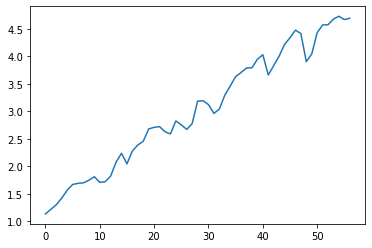

In [23]:
dset = pd.read_csv('/Users/ishan/Desktop/UCB Classes/Term 1/230E/MFE230E_PS4_data.csv')
dset.columns=['Date','P','E']
plt.plot(np.log(dset.E))

### Part (A)

In [24]:
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [25]:
def lag_mat(y,nlags,fill_value=np.nan):
    y_lags=np.empty((y.shape[0],nlags+1))
    y_lags.fill(fill_value)
    y_lags[:,0]=y    
    for i in range(1,nlags+1):
        y_lags[i:,i]=y[:-i]        
    return y_lags

def delta_y_t(order,lagmatrix):
    #delta(y_t_order) = y_t_order-y_t_order-1
    dy_1 = lagmatrix[:,order]-lagmatrix[:,order+1]
    return dy_1

In [26]:
lag_matrix_P = lag_mat(np.log(dset.P),10)
lag_matrix_E = lag_mat(np.log(dset.E),10)

In [29]:
test_stationarity(lag_matrix_P[:,0])

Results of Dickey-Fuller Test:
Test Statistic                 -0.226801
p-value                         0.935251
#Lags Used                      0.000000
Number of Observations Used    56.000000
Critical Value (1%)            -3.552928
Critical Value (5%)            -2.914731
Critical Value (10%)           -2.595137
dtype: float64


In [30]:
test_stationarity(lag_matrix_E[:,0])

Results of Dickey-Fuller Test:
Test Statistic                 -0.279175
p-value                         0.928402
#Lags Used                      6.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64


Hence both Log P and Log E are non stationary as we cannot reject the hypothesis that this time series has a unit root 

### Part (B)

In [31]:
test_stationarity(lag_matrix_P[:,0]-lag_matrix_E[:,0])

Results of Dickey-Fuller Test:
Test Statistic                 -2.360608
p-value                         0.153165
#Lags Used                      0.000000
Number of Observations Used    56.000000
Critical Value (1%)            -3.552928
Critical Value (5%)            -2.914731
Critical Value (10%)           -2.595137
dtype: float64


Hence at 5% confidence, we cannot reject the NULL hypothesis that the plot of Log(P)-Log(E) has a unit root.
Hence at 5% confidence, we conclude that Log(P/E) series is non-stationary

#### Part (C)

$\Delta X_t = \gamma \alpha^T X_{t-1} + \Phi(L) \Delta X_{t-1} + w_t$


We estmate the first equation in above vector formula

In [39]:
delta_Xt_1_0 = delta_y_t(0,lag_matrix_P)[2:]
delta_Xt_1_1 = delta_y_t(0,lag_matrix_E)[2:]

In [40]:
delta_X_tmin1_P = delta_y_t(1,lag_matrix_P).reshape(-1,1)[2:]
delta_X_tmin1_E = delta_y_t(1,lag_matrix_E).reshape(-1,1)[2:]
X_tmin1_P = lag_matrix_P[:,1][2:].reshape(-1,1)
X_tmin1_E = lag_matrix_E[:,1][2:].reshape(-1,1)

In [41]:
X = pd.DataFrame(np.concatenate([X_tmin1_P,X_tmin1_E],axis=1))

In [42]:
model_1 = sm.OLS(delta_Xt_1_0, X)

In [43]:
# First Regression in the Matrix Equation
result_1 = model_1.fit(cov_type='HAC',cov_kwds={'maxlags':1})
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.132
Model:                            OLS   Adj. R-squared (uncentered):              0.100
Method:                 Least Squares   F-statistic:                              3.622
Date:                Thu, 18 Apr 2024   Prob (F-statistic):                      0.0336
Time:                        23:06:04   Log-Likelihood:                          22.326
No. Observations:                  55   AIC:                                     -40.65
Df Residuals:                      53   BIC:                                     -36.64
Df Model:                           2                                                  
Covariance Type:                  HAC                                                  
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.0071      0.022     -0.318      0.751      -0.051       0.037
1              0.0324      0.042      0.773      0.440      -0.050       0.115
==============================================================================
Omnibus:                       16.378   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.780
Skew:                          -1.178   Prob(JB):                     5.07e-05
Kurtosis:                       4.754   Cond. No.                         16.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
"""

In [44]:
# Second Regression in the Matrix Equation
model_2 = sm.OLS(delta_Xt_1_1,X)
result_2 = model_2.fit(cov_type='HAC',cov_kwds={'maxlags':1})
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.179
Model:                            OLS   Adj. R-squared (uncentered):              0.148
Method:                 Least Squares   F-statistic:                              9.533
Date:                Thu, 18 Apr 2024   Prob (F-statistic):                    0.000291
Time:                        23:06:06   Log-Likelihood:                          25.834
No. Observations:                  55   AIC:                                     -47.67
Df Residuals:                      53   BIC:                                     -43.65
Df Model:                           2                                                  
Covariance Type:                  HAC                                                  
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.0526      0.018      2.845      0.004       0.016       0.089
1             -0.0788      0.037     -2.146      0.032      -0.151      -0.007
==============================================================================
Omnibus:                       14.923   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.978
Skew:                          -0.881   Prob(JB):                     1.02e-05
Kurtosis:                       5.630   Cond. No.                         16.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
"""

Correct specification is the below resul:

From the results above we see that the second regression has significant coefficients, indicating that $\Delta Log(P_t)$ is the common trend and $\Delta Log(E_t)$ follows it, in other words $\gamma_{1}$ is 0 and $\gamma_{2}$ is not zero where dependent variables in 1 and 2 are Log(P) and Log(E) respectively

### Part (D)

In [56]:
#p_t+5-p_t
errors_prices = []
for k in range(0,5,1):
    y = (lag_matrix_P[:,0]-lag_matrix_P[:,k+1])[k+1:]
    x = (lag_matrix_P[:,0]-lag_matrix_E[:,0])[k+1:]
    X_with_const = sm.add_constant(x)
    model = sm.OLS(y,X_with_const)
    result_2 = model.fit(cov_type='HAC',cov_kwds={'maxlags':1})
    print(f'### Summary stats for k = {k+1}, Log Prices as dependent variable ###')
    print(result_2.summary())
    print('\n')
    print(f'R-squared value = {result_2.rsquared}')
    print(f'OLS standard errors = {result_2.bse}')
    print(f'White SE value = {result_2.get_robustcov_results(cov_type="HC0").bse}')
    print(f'Newey West SE = {result_2.get_robustcov_results(cov_type="HAC", maxlags=2).bse}')
    # Estimation of Hansey Hodrick and then calculation of Standard Errors
    Z_est = result_2.model.exog
    resids_b = result_2.resid
    errors_prices.append(resids_b)

    Ze = Z_est * np.array(resids_b)[:, None]
    S = (Ze.T @ Ze) / len(Ze)

    D = Z_est.T @ Z_est / len(Z_est)
    covar_matrix = (np.linalg.inv(D.T) @ S @ np.linalg.inv(D)) / len(Z_est)

    print(f"Covariance Matrix SE: {np.sqrt(np.diag(covar_matrix))}")
    print('\n')

### Summary stats for k = 1, Log Prices as dependent variable ###
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.259
Date:                Thu, 18 Apr 2024   Prob (F-statistic):              0.267
Time:                        23:12:13   Log-Likelihood:                 23.658
No. Observations:                  56   AIC:                            -43.32
Df Residuals:                      54   BIC:                            -39.26
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------

In [57]:
#p_t+5-p_t
errors_earnings = []
for k in range(0,5,1):
    y = (lag_matrix_E[:,0]-lag_matrix_E[:,k+1])[k+1:]
    x = (lag_matrix_P[:,0]-lag_matrix_E[:,0])[k+1:]
    X_with_const = sm.add_constant(x)
    model = sm.OLS(y,X_with_const)
    result_2 = model.fit(cov_type='HAC',cov_kwds={'maxlags':1})
    print(f'### Summary stats for k = {k+1}, Log earnings as dependent variable###')
    print(result_2.summary())
    print('\n')
    print(f'R-squared value = {result_2.rsquared}')
    print(f'OLS standard errors = {result_2.bse}')
    print(f'White SE value = {result_2.get_robustcov_results(cov_type="HC0").bse}')
    print(f'Newey West SE = {result_2.get_robustcov_results(cov_type="HAC", maxlags=2).bse}')
    # Estimation of Hansey Hodrick and then calculation of Standard Errors
    Z_est = result_2.model.exog
    resids_b = result_2.resid
    errors_earnings.append(resids_b)

    Ze = Z_est * np.array(resids_b)[:, None]
    S = (Ze.T @ Ze) / len(Ze)

    D = Z_est.T @ Z_est / len(Z_est)
    covar_matrix = (np.linalg.inv(D.T) @ S @ np.linalg.inv(D)) / len(Z_est)

    print(f"Covariance Matrix SE: {np.sqrt(np.diag(covar_matrix))}")
    print('\n')

### Summary stats for k = 1, Log earnings as dependent variable###
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     3.294
Date:                Thu, 18 Apr 2024   Prob (F-statistic):             0.0751
Time:                        23:12:13   Log-Likelihood:                 27.083
No. Observations:                  56   AIC:                            -50.17
Df Residuals:                      54   BIC:                            -46.11
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------

### Part (e)

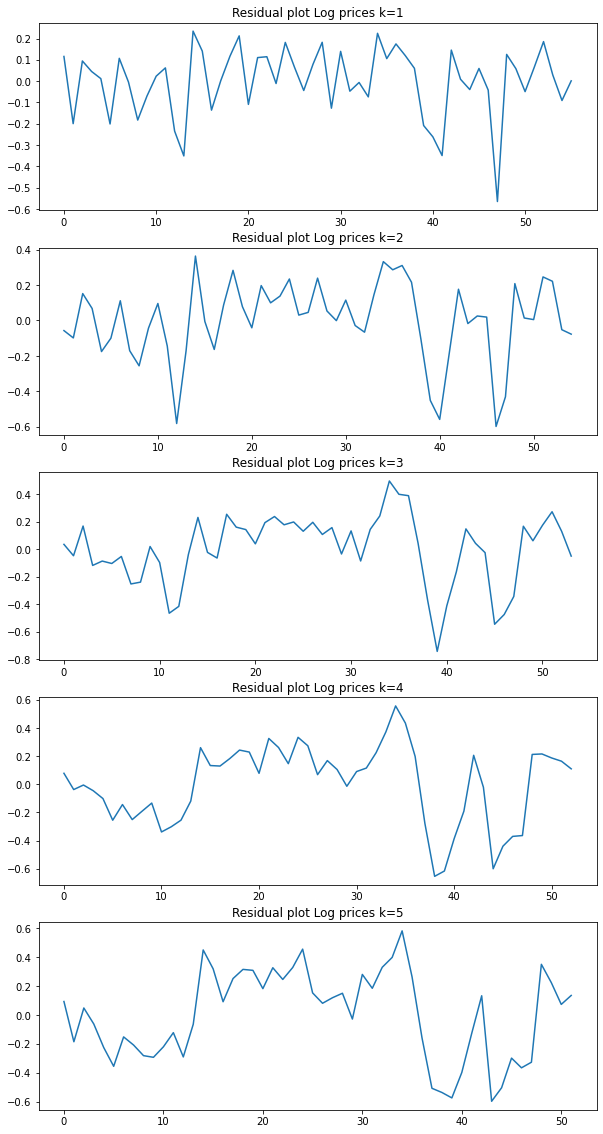

In [58]:
fig,ax = plt.subplots(nrows=5,ncols=1,figsize=(10,20))
for i,item in enumerate(errors_prices):
    ax[i].plot(item)
    ax[i].set_title(f'Residual plot Log prices k={i+1}')
    #print('\n')

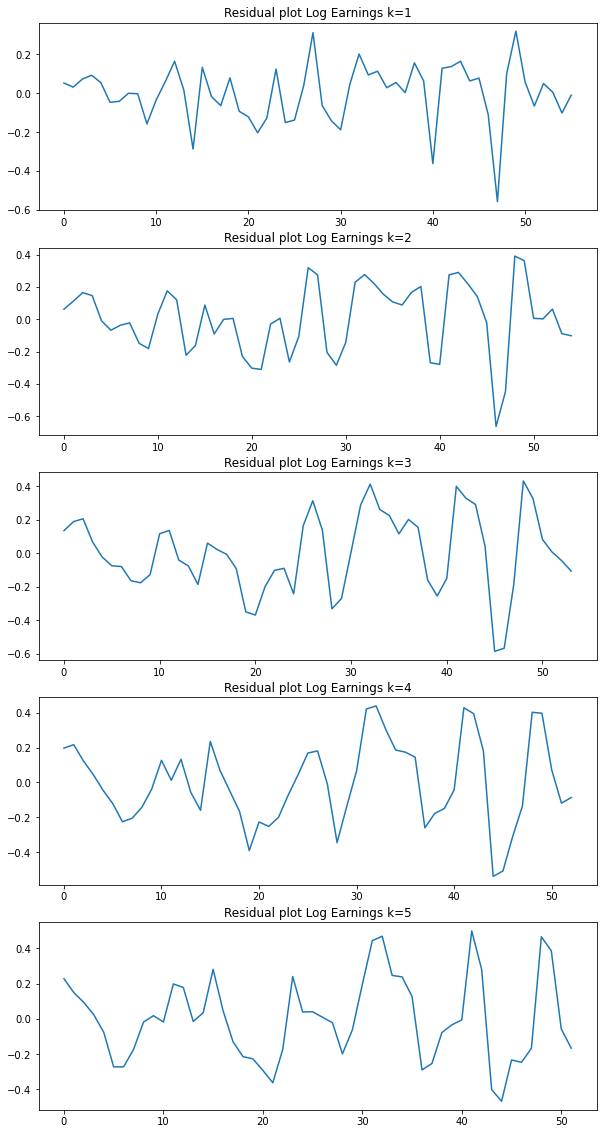

In [60]:
fig,ax = plt.subplots(nrows=5,ncols=1,figsize=(10,20))
for i,item in enumerate(errors_earnings):
    ax[i].plot(item)
    ax[i].set_title(f'Residual plot Log Earnings k={i+1}')
    print('\n')

From the residual plot for Log prices, we conclude that here is evidence for heteroskedasticity as the variance is non constant, additionally, there is evidence of serial correlation as well. Serial correlation seems lowest for k=1, and somewhat higher for higher k's.

From the residual plot for Log Earnings, we conclude that there is still some evidence for heteroskedasticity. There seems little (if any) evidence for serial correlation as the errors seems to revert pretty quickly. This is also confirmed from results of part (d) where for Log Earnings, the Newey West and OLS standard erros are pretty close.

### Part (f)

We have printed the OLS, White, Newey West and Hansey Hodrick Standard errors in part (d) above, we see should use the Newey West Standard errors to make inference on significance of coefficients given the serial correlation presnt in data.

We see that the coefficients of Log(P/E) is not significant explanatory factor for 1,2,3 day returns of prices. For k=4 day returns, we see that the Log(P/E) is significant at 10% confidence, however, using the Newey West Standard errors, the significance of Log(P/E) is further reduced as the NW SE is higher than OLS SE.

For k=5 day returns, we see that the Log(P/E) is significant at even 5% confidence, using the Newey West Standard errors, the significance of Log(P/E) is reduced somewhat as the NW SE is higher than OLS SE, however it will still stay significant enough.

So For Log prices, K=5 seems like the correct specification.

For Log earnings, we see that for k=1,2,3,4 days Log(P/E) seems significant explanatory factor. There could be a common causality here, we should perform a combined regression using k=1,2,3,4 as dependent variable to see if any of them can be rules out.

### Part (e)

In summary:

(a) returns and earnings are cointegrated with returns as the target

(b) Log price returns in long horizon regression for k=5 are explained by log P/E ratios

(c) Log earnings returns are explained by log P/E ratios